<a href="https://colab.research.google.com/github/yishanhsieh/a30-spr2024/blob/main/lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Strategy in code to stop when there are more red cards remaining than black ones ?**

**1) Initialize the deck:** The deck is initialized with 26 red cards (1s) and 26 black cards (0s)

In [ ]:
red_cards = 26 * [1]
black_cards = 26 * [0]
unshuffled_deck = red_cards + black_cards

In [ ]:
len(unshuffled_deck)

52

In [ ]:
import numpy as np # this is very important step before you start using the library

**2) Shuffle the deck:** The deck is shuffled randomly using `np.random.permutation`. This reorders the cards randomly:

In [ ]:
np.random.seed(1) # ensures that we get the same shuffled deck every time we run the simulation for consistency
shuffled_deck = np.random.permutation(unshuffled_deck)

**3) Iterative card flipping:** Now we flip cards one by one and stop when there are more red cards than black cards remaining in the unflipped portion of the deck.

To do this, we need to track how many red and black cards remain as we flip through the deck.

In [ ]:
red_remaining = 26  # Start with all 26 red cards available
black_remaining = 26  # Start with all 26 black cards available

for card in shuffled_deck:
    if red_remaining > black_remaining:  # Strategy: stop flipping
        break  # Stop flipping when more red cards remain than black

    # After flipping a card, we update the count of remaining cards:
    if card == 1:  # If the flipped card is red
        red_remaining -= 1  # Decrease red card count
    else:  # If the flipped card is black
        black_remaining -= 1  # Decrease black card count

# Flip one more card after stopping
final_card = shuffled_deck[len(shuffled_deck) - red_remaining - black_remaining]
if final_card == 1:
    print("You win a dollar!")
else:
    print("You lose a dollar.")

You win a dollar!


- Generalize the startegy by making remaining red card flexible

In [ ]:
# Step 1: Create the deck
red_cards = 26 * [1]
black_cards = 26 * [0]
unshuffled_deck = red_cards + black_cards

# Step 2: Shuffle the deck
np.random.seed(1)  # For reproducibility
shuffled_deck = np.random.permutation(unshuffled_deck)

# Step 3: Initialize remaining counts
red_remaining = 26
black_remaining = 26
total_cards = 52  # Total number of cards in the deck

# Step 4: Flip cards until we decide to stop based on min_fraction_red
min_fraction_red = 0.2  # Generalized parameter for flexibility

for i, card in enumerate(shuffled_deck):
    # Calculate the fraction of remaining red cards
    fraction_red_cards = red_remaining / (total_cards - i)

    # Stop if the fraction of remaining red cards exceeds the threshold
    if fraction_red_cards > min_fraction_red:
        break

    # Update remaining card counts/
    if card == 1:
        red_remaining -= 1
    else:
        black_remaining -= 1

# Step 5: Flip one more card after stopping
final_card = shuffled_deck[i + 1]  # The next card after we stop
if final_card == 1:
    print("You win a dollar!")
else:
    print("You lose a dollar.")

You win a dollar!


OR

In [ ]:
import numpy as np

# Step 1: Create the deck
red_cards = 26 * [1]
black_cards = 26 * [0]
unshuffled_deck = red_cards + black_cards

# The execute_strategy function implementing the card-flipping strategy
def execute_strategy(min_fraction_red=0.5, shuffled_deck=None, return_index=False):
    # Step 2: Shuffle the deck if no shuffled deck is provided
    if shuffled_deck is None:
        shuffled_deck = np.random.permutation(unshuffled_deck)

    # Step 3: Initialize remaining counts
    red_remaining = 26
    total_cards = 52

    # Step 4: Flip cards until we decide to stop based on min_fraction_red
    for i, card in enumerate(shuffled_deck[:-1]):  # Avoid accessing the last card
        # Calculate the fraction of remaining red cards
        fraction_red_cards = red_remaining / (total_cards - i)

        # Stop if the fraction of remaining red cards exceeds the threshold
        if fraction_red_cards > min_fraction_red:
            break

        # Update remaining card counts
        if card == 1:
            red_remaining -= 1

    # Step 5: Return the next card after stopping
    # Ensure we're not accessing out of bounds by checking the index
    if i + 1 < len(shuffled_deck):
        final_card = shuffled_deck[i + 1]  # The next card after we stop
    else:
        final_card = shuffled_deck[i]  # Handle the case if the loop ends near the last card

    # Return the final card and optionally its index
    if return_index:
        return i + 1, final_card  # Return the index and card value
    else:
        return final_card  # Return only the card value (1 for win, 0 for loss)

# Set the seed to 0 for reproducibility, like in the book
np.random.seed(0)

In [ ]:
# Test the function with 1000 simulations
observations = np.array([execute_strategy() for _ in range(1000)])

# Calculate the frequency of wins
frequency_wins = observations.mean()

# Print the result
print(f"The frequency of wins is {frequency_wins}")

The frequency of wins is 0.502


- **We’ve won 50.2% of the total games! Our strategy appears to be working: 502 wins and 498 losses will net us a total profit of $4.**

In [ ]:
# Computing total profit
dollars_won = frequency_wins * 1000
dollars_lost = (1 - frequency_wins) * 1000
total_profit = dollars_won - dollars_lost
print(f"Total profit is ${total_profit:.2f}")

Total profit is $4.00


#### **Plotting simulated frequencies of wins**

In [ ]:
def repeat_game(number_repeats):
    observations = np.array([execute_strategy() for _ in range(number_repeats)])
    return observations.mean()

frequencies = []
for i in range(1, 1000):
    frequencies.append(repeat_game(i))

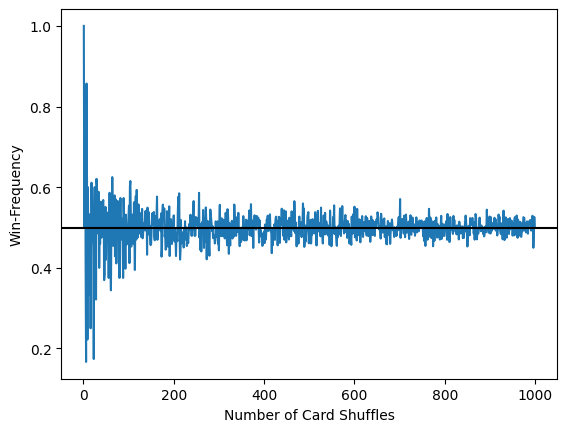

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(range(1, 1000)), frequencies)
plt.axhline(0.5, color='k')
plt.xlabel('Number of Card Shuffles')
plt.ylabel('Win-Frequency')
plt.show()

In [ ]:
print(f"The win-frequency for 10,000 shuffles is {frequencies[-1]}")

The win-frequency for 10,000 shuffles is 0.5015015015015015


*After this we can try doing millions of shuffles but still the frequency stayed between - 0.488 to 0.501 (so there is a very good chance we of us loosing a lot of money here)*

### **Optimizing strategies using the sample space for a 10-card deck**

In [ ]:
# helper code

def get_matching_event(event_condition, sample_space):
 return set([outcome for outcome in sample_space if event_condition(outcome)])

def compute_event_probability(event_condition, generic_sample_space):
 event = get_matching_event(event_condition, generic_sample_space)
 if type(generic_sample_space) == type(set()):
  return len(event) / len(generic_sample_space)
 event_size = sum(generic_sample_space[outcome] for outcome in event)
 return event_size / sum(generic_sample_space.values())

In [ ]:
import itertools

total_cards = 10
total_red_cards = int(total_cards / 2)
total_black_cards = total_red_cards
unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards
sample_space = set(itertools.permutations(unshuffled_deck))
win_condition = lambda x: execute_strategy(shuffled_deck=np.array(x))
prob_win = compute_event_probability(win_condition, sample_space)
print(f"Probability of a win is {prob_win}")

Probability of a win is 0.5


In [ ]:
def scan_strategies():
  fractions = [value / 100 for value in range(50, 100)]
  probabilities = []

  for frac in fractions:
    win_condition = lambda x: execute_strategy(frac, shuffled_deck=np.array(x))
    probabilities.append(compute_event_probability(win_condition, sample_space))

  return probabilities

probabilities = scan_strategies()
print(f"Lowest probability of win is {min(probabilities)}")
print(f"Highest probability of win is {max(probabilities)}")

Lowest probability of win is 0.5
Highest probability of win is 0.5


- Let’s analyze the sample spaces of decks containing two, four, six, and
eight cards. We apply all strategies to each sample space and return their probabilities of winning. Then we search for a probability that isn’t equal to 0.5.

In [ ]:
for total_cards in [2, 4, 6, 8]:
  total_red_cards = int(total_cards / 2)
  total_black_cards = total_red_cards
  unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards
  sample_space = set(itertools.permutations(unshuffled_deck))
  probabilities = scan_strategies()
  if all(prob == 0.5 for prob in probabilities):
    print(f"No winning strategy found for deck of size {total_cards}")
  else:
    print(f"Winning strategy found for deck of size {total_cards}")

No winning strategy found for deck of size 2
No winning strategy found for deck of size 4
No winning strategy found for deck of size 6
No winning strategy found for deck of size 8


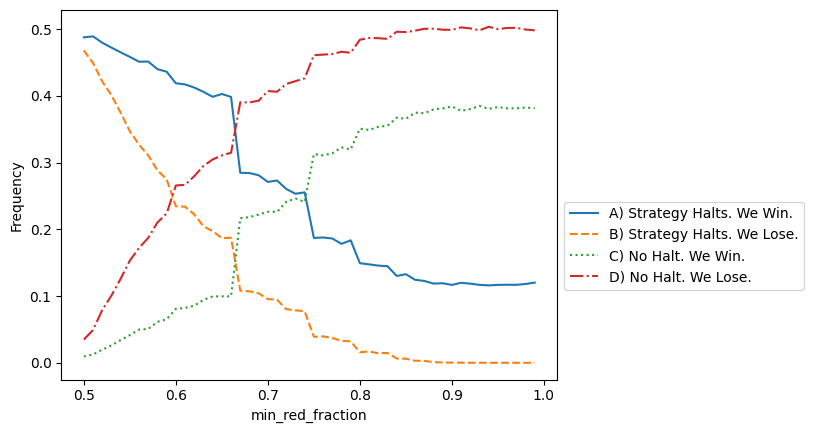

In [ ]:
np.random.seed(0)
total_cards = 52
total_red_cards = 26
unshuffled_deck = red_cards + black_cards

def repeat_game_detailed(number_repeats, min_red_fraction):
  observations = [execute_strategy(min_red_fraction, return_index=True) for _ in range(num_repeats)]
  successes = [index for index, card, in observations if card == 1]
  halt_success = len([index for index in successes if index != 51])
  no_halt_success = len(successes) - halt_success
  failures = [index for index, card, in observations if card == 0]
  halt_failure = len([index for index in failures if index != 51])
  no_halt_failure = len(failures) - halt_failure
  result = [halt_success, halt_failure, no_halt_success, no_halt_failure]
  return [r / number_repeats for r in result]


fractions = [value / 100 for value in range(50, 100)]
num_repeats = 50000
result_types = [[], [], [], []]

for fraction in fractions:
  result = repeat_game_detailed(num_repeats, fraction)
  for i in range(4):
    result_types[i].append(result[i])

plt.plot(fractions, result_types[0], label='A) Strategy Halts. We Win.')
plt.plot(fractions, result_types[1], linestyle='--', label='B) Strategy Halts. We Lose.')
plt.plot(fractions, result_types[2], linestyle=':', label='C) No Halt. We Win.')
plt.plot(fractions, result_types[3], linestyle='-.', label='D) No Halt. We Lose.')
plt.xlabel('min_red_fraction')
plt.ylabel('Frequency')
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()